In [465]:
#import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
#from xgboost import XGBRegressor
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import os.chdir("path")
df=pd.read_csv('E:/Data Science/data/chennai_house_price_prediction.csv')

In [466]:
df.shape

(7109, 19)

In [467]:
df.drop_duplicates().shape   # no duplicates

(7109, 19)

In [468]:
df.head(10)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [469]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [470]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [471]:
df.describe(include="all")

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P03210,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [472]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

N_BEDROOM         1
N_BATHROOM        5
QS_OVERALL       48

In [473]:
temp = pd.DataFrame(index = df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp["unique_count"]=df.nunique()

In [474]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


# Univariate Analysis

##  Continuous Variable

Text(0.5, 0, 'Price')

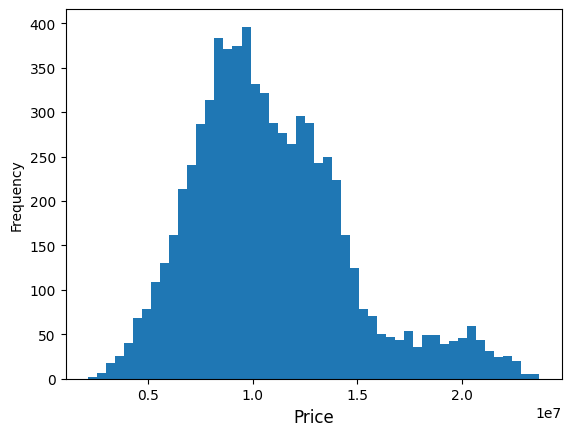

In [475]:
df['SALES_PRICE'].plot(kind='hist',bins=50)  
plt.xlabel('Price',fontsize=12)
# Right skewed

(array([  2.,   6.,  18.,  26.,  40.,  68.,  79., 109., 130., 162., 214.,
        241., 287., 314., 383., 371., 374., 396., 332., 321., 288., 276.,
        264., 296., 288., 243., 249., 224., 162., 125.,  79.,  71.,  50.,
         47.,  44.,  54.,  36.,  49.,  49.,  39.,  42.,  46.,  59.,  44.,
         31.,  25.,  26.,  20.,   5.,   5.]),
 array([ 2156875. ,  2587084.3,  3017293.6,  3447502.9,  3877712.2,
         4307921.5,  4738130.8,  5168340.1,  5598549.4,  6028758.7,
         6458968. ,  6889177.3,  7319386.6,  7749595.9,  8179805.2,
         8610014.5,  9040223.8,  9470433.1,  9900642.4, 10330851.7,
        10761061. , 11191270.3, 11621479.6, 12051688.9, 12481898.2,
        12912107.5, 13342316.8, 13772526.1, 14202735.4, 14632944.7,
        15063154. , 15493363.3, 15923572.6, 16353781.9, 16783991.2,
        17214200.5, 17644409.8, 18074619.1, 18504828.4, 18935037.7,
        19365247. , 19795456.3, 20225665.6, 20655874.9, 21086084.2,
        21516293.5, 21946502.8, 22376712.1, 22

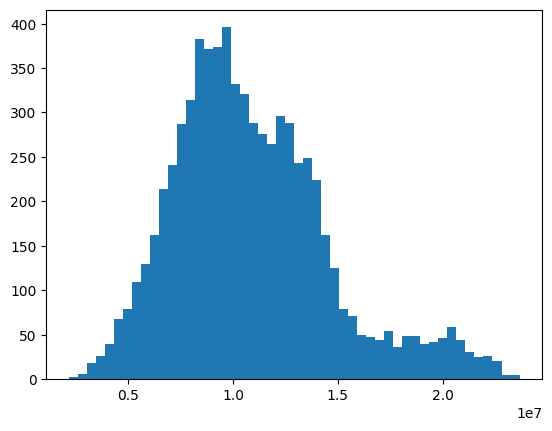

In [476]:
plt.hist(df['SALES_PRICE'],bins=50)

df=df.astype({'N_BATHROOM':'int64'})
              
df['N_BATHROOM']             # at present there are missing values

Text(0.5, 0, 'price')

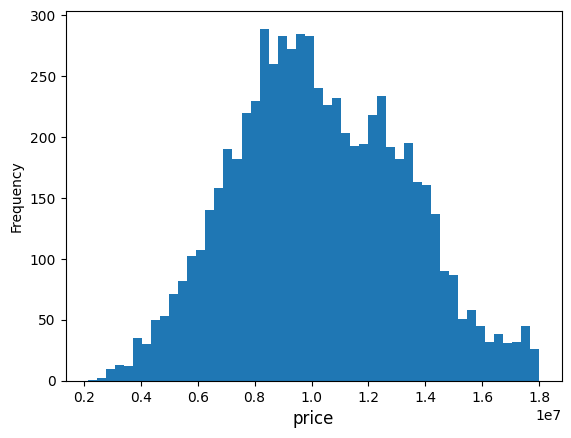

In [477]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot(kind='hist',bins=50,)     #  loc[]   with condition (bool op)
plt.xlabel('price',fontsize=12)                                                  #  iloc[st:end,st:end]     rows,columns

Text(0.5, 0, 'Area in square feet')

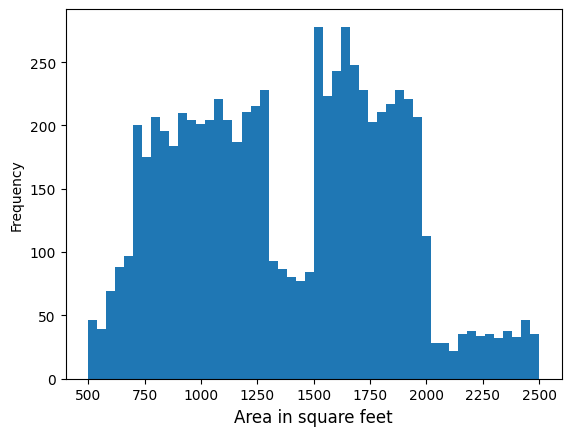

In [478]:
df['INT_SQFT'].plot(kind='hist',bins=50)
plt.xlabel('Area in square feet',fontsize=12)

__ most houses have an area in b/w 750 - 1250  and  1500 - 2000 __

In [479]:
# sns.distplot(df['INT_SQFT'],bins=50,kde=False,axlabel='Area_in_SQ-feet')

Most houses have area in b/w 750-1250 or 1500-2000 sq feet

Text(0, 0.5, 'Frequency')

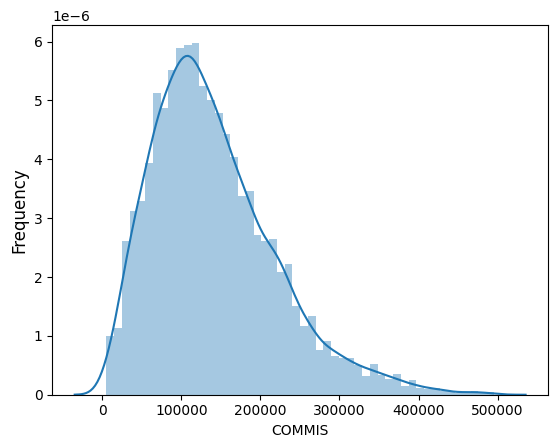

In [480]:
sns.distplot(df['COMMIS'],bins=50)
plt.ylabel('Frequency',fontsize=12)

<Axes: xlabel='DIST_MAINROAD', ylabel='Density'>

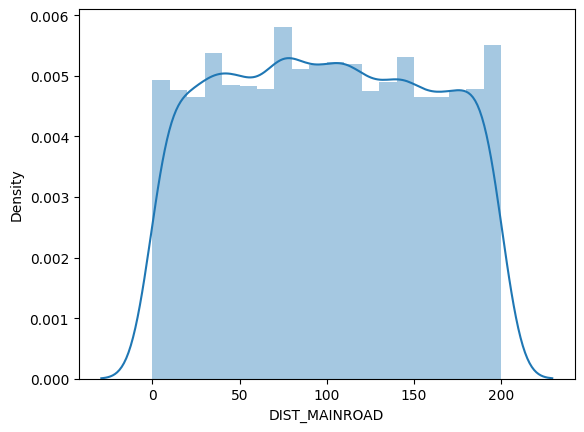

In [481]:
sns.distplot(df['DIST_MAINROAD'])

## Categorical Variables

In [482]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

IT should be object type ....but now it has missing values ::  later....astype()

In [483]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

Most houses have 1 Bedroom

In [484]:
#df['N_BEDROOM'].value_counts().plot(kind='bar')

In [485]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

Most houses have 1 bathroom

In [486]:
#df['N_BATHROOM'].value_counts().plot(kind='bar')


## CHECKING FOR ERRONEOUS LABELS, MISSING VALUES FILLING


<Axes: >

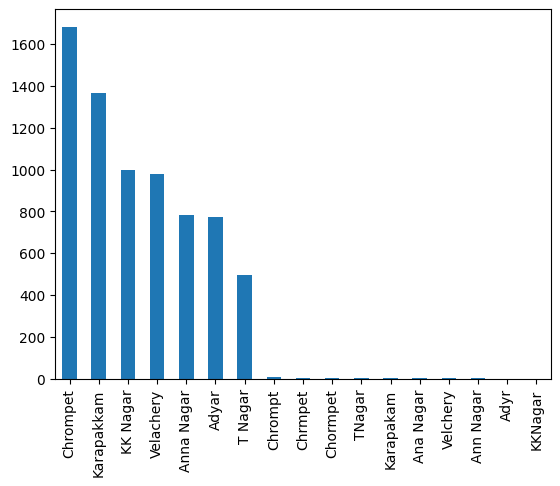

In [487]:
df['AREA'].value_counts().plot(kind='bar')

<Axes: >

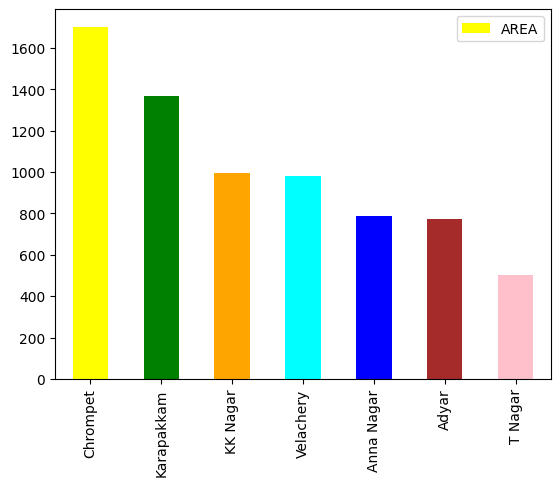

In [488]:
x={"Chrompt":"Chrompet","Chormpet":"Chrompet","Chrmpet":"Chrompet","TNagar":"T Nagar","Ann Nagar":"Anna Nagar",\
   "Adyr":"Adyar","KKNagar":"KK Nagar","Velchery":"Velachery","Karapakam":"Karapakkam","Ana Nagar":"Anna Nagar"}
df['AREA'].replace(x, inplace=True)
df["AREA"].value_counts().plot(kind='bar',legend=True,color=['yellow','green','orange','cyan','blue','brown','pink'])
                    

<Axes: >

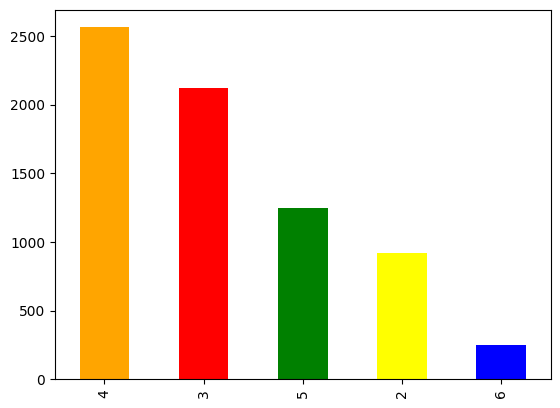

In [489]:
df['N_ROOM'].value_counts().plot(kind='bar',color=['orange','red','green','yellow','blue'])

Text(0.5, 0, 'Strret Type')

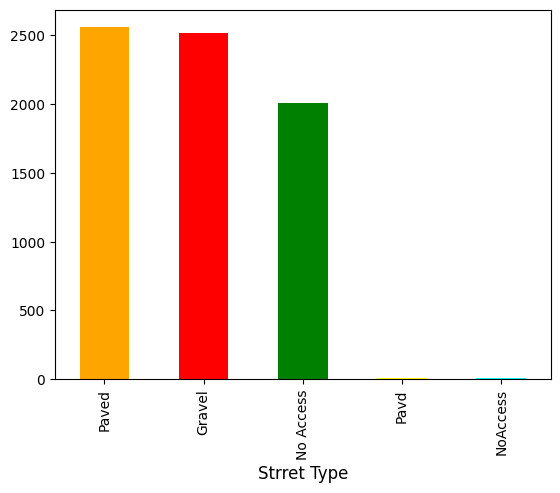

In [490]:
df['STREET'].value_counts().plot(kind='bar',color=['orange','red','green','yellow','cyan'])
plt.xlabel('Strret Type',fontsize=12)

<Axes: >

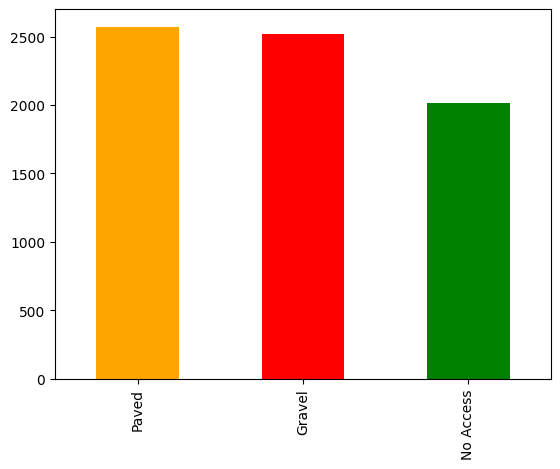

In [491]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)
df['STREET'].value_counts().plot(kind='bar',color=['orange','red','green','yellow','blue'])

In [492]:
df['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

## CHECKING LABEL NAMES (correction done fr Area,parkfacil,street)
- Better to use this method (BELOW) to find errors in labels than doing graphs one by one

In [493]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************ Value Count in', i, '************')
    print(df[i].value_counts())
    print('')

************ Value Count in AREA ************
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

************ Value Count in N_BEDROOM ************
1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

************ Value Count in N_BATHROOM ************
1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

************ Value Count in N_ROOM ************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

************ Value Count in SALE_COND ************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

************ Value Count in PARK_FACIL ************
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

************ Value Count in BUILDTYPE ************
House     

**Update names in column**
- SALE_COND
- BUILDTYPE
- UTILITY_AVAIL

**1.SALE_COND**

In [494]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**2.BUILDTYPE , 3.UTILITY_AVAIL**

In [495]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)

### ALL LABEL CORRECTION DONE ...

### Now checking missing values and datatype correction

In [496]:
temp = pd.DataFrame(index = df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp["unique_count"]=df.nunique() 

In [497]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,7
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,5
PARK_FACIL,object,0,2
BUILDTYPE,object,0,3


### Need to cnvrt N_BEDROOM,N_BATHROOM,N_ROOM to obj data type

### Need to fill N_BEDROOM................N_BATHROOM.................QS_OVERALL       

**Filling no of Bedrooms and Bathrooms**

In [498]:
df.head(25)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [499]:
print("Mode of Bedrooms=",df['N_BEDROOM'].mode()[0])     # only one missing therefore no prblm
print("Mode of Bathrooms=",df['N_BEDROOM'].mode()[0])     

Mode of Bedrooms= 1.0
Mode of Bathrooms= 1.0


In [500]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chrompet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [501]:
df["N_BEDROOM"].fillna(value=df['N_BEDROOM'].mode()[0],inplace=True)
df["N_BATHROOM"].fillna(value=df['N_BATHROOM'].mode()[0],inplace=True)      # in head() we can observe 2 bathrooms are req fr
print(df["N_BEDROOM"].isnull().sum()," ",df["N_BATHROOM"].isnull().sum())   #  bedroom >= 3

0   0


<Axes: >

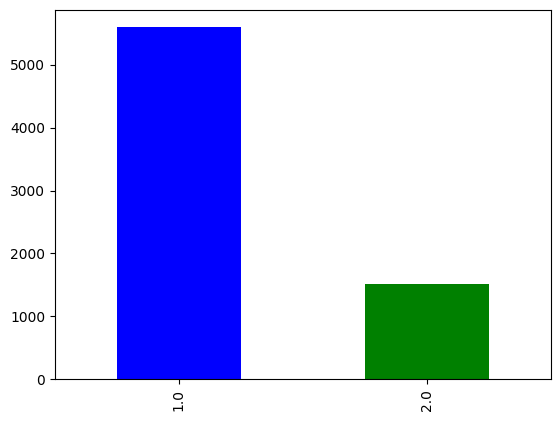

In [502]:
df["N_BATHROOM"].value_counts().plot(kind='bar',color=['blue','green'])

#### 3. QS_OVERALL

In [503]:
df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [504]:
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_BEDROOM'], temp], axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


**So Qs Overall corresponds to average QS score**

In [505]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [506]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [507]:
df['QS_OVERALL'] =  df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

In [508]:
# data type of n_bedroom, n_room, n_bathroom to object

df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

In [509]:
temp = pd.DataFrame(index = df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp["unique_count"]=df.nunique() 
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,7
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,object,0,4
N_BATHROOM,object,0,2
N_ROOM,object,0,5
SALE_COND,object,0,5
PARK_FACIL,object,0,2
BUILDTYPE,object,0,3


#### All data correction done

## NOW the implementation of Regression

First findin if regression possible!!

In [510]:
df.corr()

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.019850,-0.008337,0.008865,0.012408,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,0.002237,-0.029468,0.001554,-0.016678,0.010994,0.018783
QS_ROOMS,0.019850,0.002237,1.000000,0.008828,0.007789,0.517224,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,0.008828,1.000000,-0.011745,0.551826,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.007789,-0.011745,1.000000,0.629948,0.020118,0.018804
QS_OVERALL,0.012408,-0.016678,0.517224,0.551826,0.629948,1.000000,0.017057,0.020016
COMMIS,0.571076,0.010994,0.009377,-0.000471,0.020118,0.017057,1.000000,0.626275
SALES_PRICE,0.612125,0.018783,0.021967,-0.011377,0.018804,0.020016,0.626275,1.000000


<Axes: >

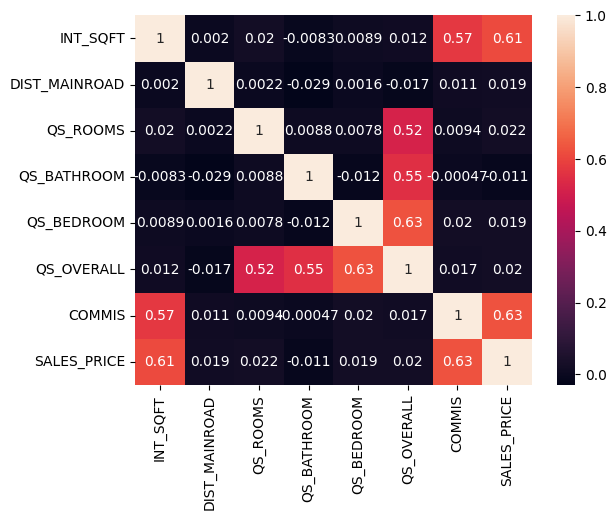

In [511]:
sns.heatmap(df.corr(),annot=True)

**correlation found for numerical datas**
  - sales_price & INt-sqft (0.612125)
  - sales_price & commis   (0.626275)
  - (+ve correlation both)

In [512]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [513]:
'''sns.pairplot(df,y_vars=['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],x_vars=['SALES_PRICE'],kind='scatter')
plt.show()     '''            # TAKES tooo much time better to look individually after finding correlation

"sns.pairplot(df,y_vars=['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',\n       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',\n       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',\n       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],x_vars=['SALES_PRICE'],kind='scatter')\nplt.show()     "

From this we can analyse houses having which facilities , location etc have what type of price range
- commercial houses are more costly
- houses having 4-5 rooms are most costly
- houses in T Nagar , Anna Nagar are more costly

CAN try Group by for more insights

<Axes: xlabel='SALES_PRICE', ylabel='INT_SQFT'>

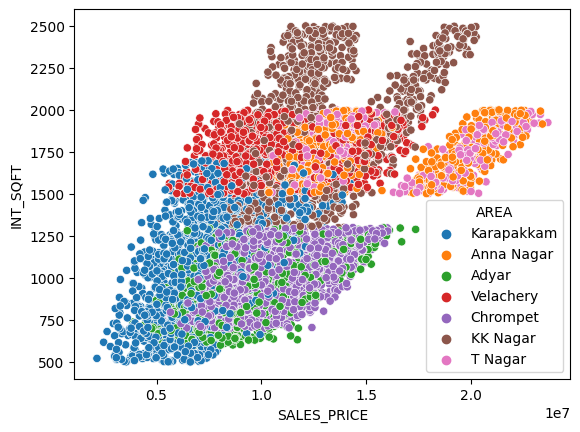

In [514]:
sns.scatterplot(data=df,x=df['SALES_PRICE'],y=df['INT_SQFT'],hue=df['AREA'])

## Linear Regression Model

In [515]:
df.drop(['PRT_ID'], axis=1, inplace = True)

In [516]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


- Using LabelEncoding here

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   object 
 4   N_BATHROOM     7109 non-null   object 
 5   N_ROOM         7109 non-null   object 
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  COMMIS         7109 non-null   int64  
 17  SALES_PRICE    7109 non-null   int64  
dtypes: float

In [518]:
df = df.astype({'N_BEDROOM': 'int', 'N_ROOM': 'int', 'N_BATHROOM': 'int'})

In [519]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['AREA']= label_encoder.fit_transform(df['AREA']) 
df['MZZONE']= label_encoder.fit_transform(df['MZZONE'])
df['SALE_COND']= label_encoder.fit_transform(df['SALE_COND'])
df['PARK_FACIL']= label_encoder.fit_transform(df['PARK_FACIL'])
df['BUILDTYPE']= label_encoder.fit_transform(df['BUILDTYPE'])
df['UTILITY_AVAIL']= label_encoder.fit_transform(df['UTILITY_AVAIL'])
df['STREET']= label_encoder.fit_transform(df['STREET'])

print(df.head())


   AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0     4      1004            131          1           1       3          0   
1     1      1986             26          2           1       5          0   
2     0       909             70          1           1       3          0   
3     6      1855             14          3           2       5          2   
4     4      1226             84          1           1       3          0   

   PARK_FACIL  BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  QS_ROOMS  \
0           1          0              0       2       0       4.0   
1           0          0              0       0       3       4.9   
2           1          0              1       0       4       4.1   
3           0          2              3       2       2       4.7   
4           1          2              0       0       1       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  COMMIS  SALES_PRICE  
0          3.9         4.9       4.330  144400      76

In [520]:
df['MZZONE'].value_counts()

4    1858
3    1822
5    1817
1     550
0     537
2     525
Name: MZZONE, dtype: int64

- Using One Hot Encoding here

In [521]:
df2 = pd.get_dummies(df)         #this code wasn't hashed initially

In [522]:
df2.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,4,1004,131,1,1,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,144400,7600000
1,1,1986,26,2,1,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,304049,21717770
2,0,909,70,1,1,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,92114,13159200
3,6,1855,14,3,2,5,2,0,2,3,2,2,4.7,3.9,3.6,4.010,77042,9630290
4,4,1226,84,1,1,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,74063,7406250


In [523]:
df2.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [524]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int32  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int32  
 4   N_BATHROOM     7109 non-null   int32  
 5   N_ROOM         7109 non-null   int32  
 6   SALE_COND      7109 non-null   int32  
 7   PARK_FACIL     7109 non-null   int32  
 8   BUILDTYPE      7109 non-null   int32  
 9   UTILITY_AVAIL  7109 non-null   int32  
 10  STREET         7109 non-null   int32  
 11  MZZONE         7109 non-null   int32  
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  COMMIS         7109 non-null   int64  
 17  SALES_PRICE    7109 non-null   int64  
dtypes: float

In [572]:
x = df2.drop('SALES_PRICE', axis=1)    #df2
y= df2['SALES_PRICE']                   #df2

### Train Test Split

In [567]:
from sklearn.model_selection import train_test_split, cross_val_score
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4976, 17), (2133, 17), (4976,), (2133,))

In [568]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error

In [569]:
def Regression(model):
    model.fit(train_x,train_y)
    pred_train = model.predict(train_x)
    train_score = mean_squared_log_error(train_y,pred_train)  #np.sqrt(mean_squared_log_error(train_y,pred_train))
    pred_test = model.predict(test_x)
    test_score = mean_squared_log_error(test_y,pred_test)  #np.sqrt(mean_squared_log_error(valid_y,pred_test))
    print('Training score:', train_score)
    print('Test score:', test_score)
    score=cross_val_score(model,x,y,cv=5)      # will give 5 scores cv=5 => 5 folds
    print('CV_score:',np.mean(score))

- What is this test score here, why is it calculated ?

### Model Evaluation - RMSLE

In [570]:
model=LinearRegression()
Regression(model)

Training score: 0.02976090194412681
Test score: 0.029607288573237054
CV_score: 0.8056383694350204


In [571]:
model=DecisionTreeRegressor()
Regression(model)

Training score: 0.0
Test score: 0.00831081761816142
CV_score: 0.9548382619429028


In [555]:
#model = AdaBoostRegressor(n_estimators=10,learning_rate=1)
#Regression(model)

In [556]:
# due to some reason taking too much time
'''model=AdaModel.fit(train_x,train_y)

pred_train=model.predict(train_x)
train_score=np.sqrt(mean_squared_log_error(train_y,pred_train))'''

'model=AdaModel.fit(train_x,train_y)\n\npred_train=model.predict(train_x)\ntrain_score=np.sqrt(mean_squared_log_error(train_y,pred_train))'

In [557]:
#pred_test = model.predict(valid_x)
#valid_score=np.sqrt(mean_squared_log_error(valid_y,pred_test))

In [558]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [559]:
# Create an ANN model for this also and check it's perormance